In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2022-12-14 08:18:39.489729


<h2>Econdb - The Database of Economic Indicators</h2>

Econdb https://www.econdb.com/ sisältää talouteen liittyviä indikaattoreita (Inflation, Real GDP, Industrial production jne.). Sieltä voi hakea aikasarjan tickerin perusteella.

Seuraavaa esimerkkiä varten valitsin Econdb:n etusivulta indikaattoriksi Real GDP ja tämän jälkeen alueeksi Europe - Finland. Oikealta löysin aikasarjan otsikosta tickerin **RGDPFI**. Vastaavalla tavalla etsin Ruotsin bkt:n tickerin.

Seuraavassa tarvitaan pandas-datareader -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen komentoriviltä komennolla `conda install -c anaconda pandas-datareader`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

<h3>Haku tickerin perusteella</h3>

In [3]:
# Suomen bruttokansantuotteen reaaliarvot
df1 = web.DataReader('ticker=RGDPFI', 'econdb')

# Ruotsin bruttokansantuotteen reaaliarvot
df2 = web.DataReader('ticker=RGDPSE', 'econdb')

# Yhdistetään datat ja muutetaan arvot muutosprosenteiksi
df = pd.concat([df1.pct_change()*100, df2.pct_change()*100], axis=1)
df.columns = ['Finland', 'Sweden']
df

,Finland,Sweden
TIME_PERIOD,,
2018-01-01,NaN,NaN
2018-04-01,-0.093335,1.002517
2018-07-01,-0.118099,-0.702166
2018-10-01,-0.042354,1.141665
2019-01-01,0.752105,0.649678
2019-04-01,0.816584,0.566771
2019-07-01,0.062573,0.269117
2019-10-01,-0.241449,0.158269
2020-01-01,-0.100993,-0.002747


Text(0, 0.5, 'Muutosprosentti')

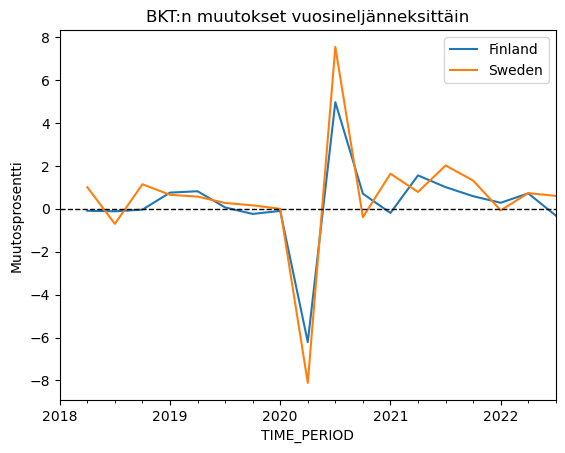

In [4]:
# BKT:n muutosprosentit viivakaaviona

df.plot()
plt.axhline(y=0, color = 'black', linewidth = 1, linestyle = '--')
plt.title('BKT:n muutokset vuosineljänneksittäin')
plt.ylabel('Muutosprosentti')